In [1]:
import matplotlib.pyplot as plt

In [2]:
def pricing_model(current_proportions, target_proportions, current_price, base_scale, base_price_increase, k_range):
    for k in k_range:
        new_prices = [current_price + k * (base_scale ** i) * (current_p - target_p) + base_price_increase * i
                      for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions))]
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(current_proportions)), new_prices, label=f'k={k}')
        plt.title(f'New Prices by Congestion Bucket for k = {k}')
        plt.xlabel('Congestion Bucket')
        plt.ylabel('New Price')
        plt.legend()
        plt.grid(True)
        plt.show()

In [3]:
def base_bucket_model(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase):
    for k in k_range:
        new_prices = []
        for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions)):
            if i == base_bucket:
                new_price = current_price
            else:
                price_adjustment = k * (base_scale ** abs(i - base_bucket)) * (current_p - target_p)
                if i > base_bucket:
                    price_adjustment += base_price_increase * (i - base_bucket)
                else:
                    price_adjustment -= base_price_increase * (base_bucket - i)
                new_price = current_price + price_adjustment
            new_prices.append(new_price)
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(current_proportions)), new_prices, label=f'k={k}', marker='o', linestyle='-')
        plt.title(f'New Prices by Congestion Bucket for k = {k}')
        plt.xlabel('Congestion Bucket')
        plt.ylabel('New Price')
        plt.axhline(y=current_price, color='r', linestyle='--', label="Base Price (Bucket 4)")
        plt.legend()
        plt.grid(True)
        plt.show()

In [4]:
def base_bucket_model_experimental(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase):
    results = {}
    for k in k_range:
        for scale in base_scale:
            for increase in base_price_increase:
                new_prices = []
                strictly_increasing = True
                last_price = -float('inf')
                
                for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions)):
                    if i == base_bucket:
                        new_price = current_price
                    else:
                        price_adjustment = k * (scale ** abs(i - base_bucket)) * (current_p - target_p)
                        if i > base_bucket:
                            price_adjustment += increase * (i - base_bucket)
                        else:
                            price_adjustment -= increase * (base_bucket - i)
                        new_price = current_price + price_adjustment
                    
                    if new_price <= last_price:
                        strictly_increasing = False
                    last_price = new_price
                    new_prices.append(new_price)
                
                if strictly_increasing:
                    results[(k, scale, increase)] = new_prices
                    plt.figure(figsize=(10, 5))
                    plt.plot(range(len(current_proportions)), new_prices, marker='o', linestyle='-')
                    plt.axhline(y=current_price, color='r', linestyle='--', label="Base Price (Bucket 4)")
                    plt.title(f'Prices for k={k}, Scale={scale}, Increase={increase}')
                    plt.xlabel('Congestion Bucket')
                    plt.ylabel('Price')
                    plt.ylim(bottom=0)
                    plt.grid(True)
                    plt.show()

    return results

In [5]:
def plot_proportions():
    plt.figure(figsize=(10, 6))
    plt.plot(current_proportions, label='Current Proportions', marker='o', linestyle='-', color='blue')
    plt.plot(target_proportions, label='Target Proportions', marker='x', linestyle='--', color='green')
    plt.title('Comparison of Current and Target Proportions Across Congestion Buckets')
    plt.xlabel('Congestion Bucket')
    plt.ylabel('Proportions')
    plt.xticks(range(len(current_proportions)))  # Ensure ticks cover all buckets
    plt.legend()
    plt.grid(True)
    plt.show()

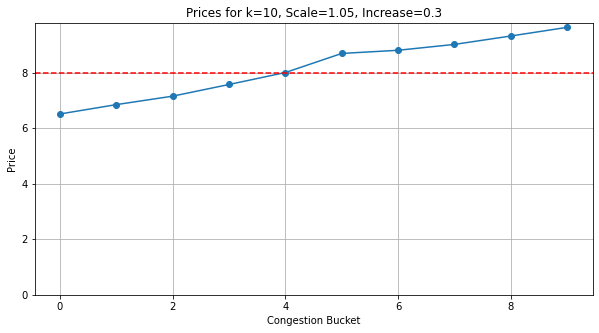

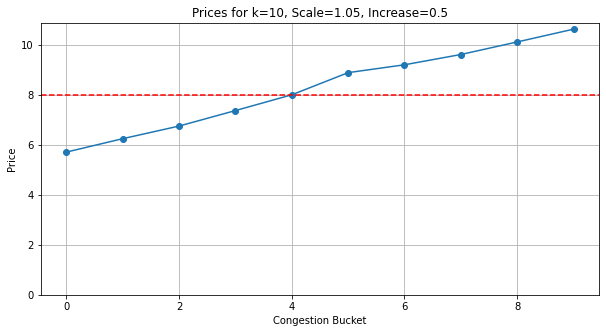

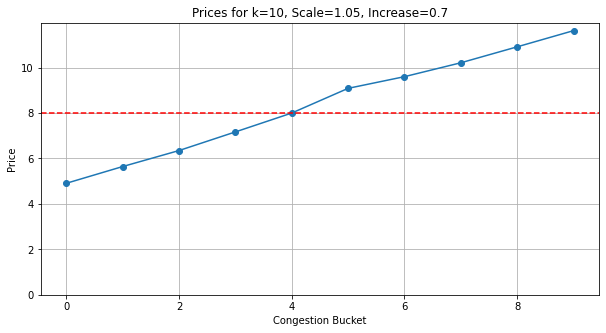

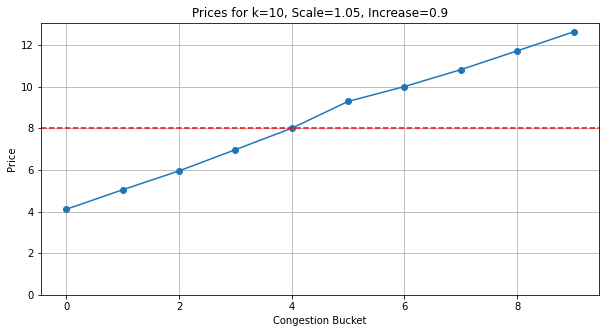

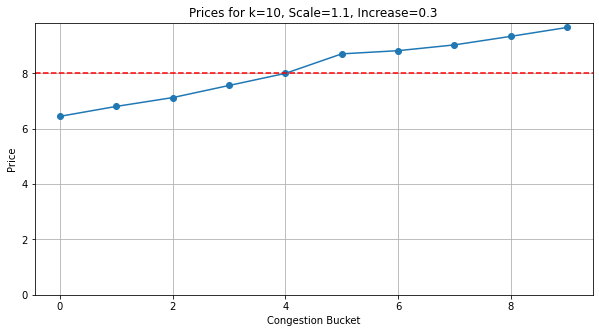

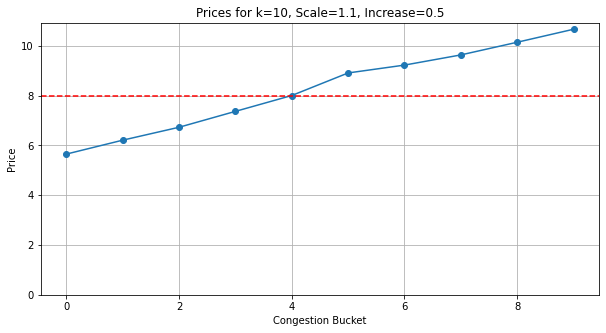

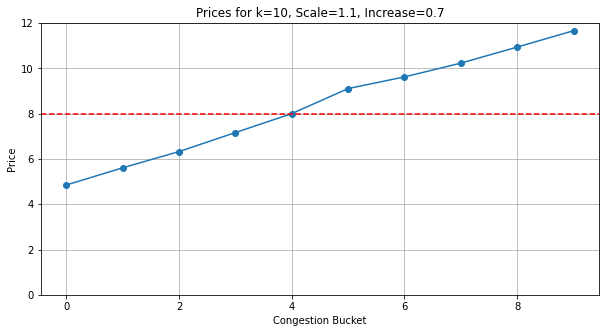

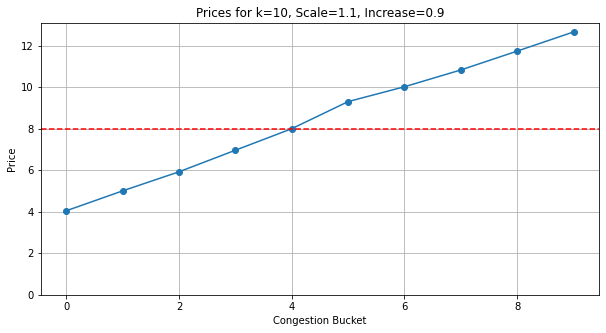

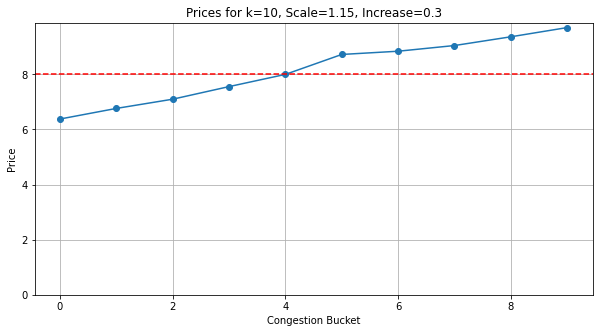

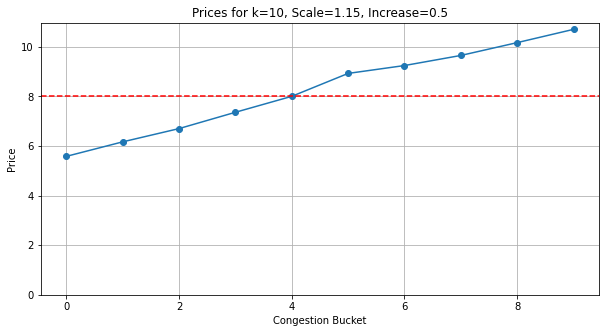

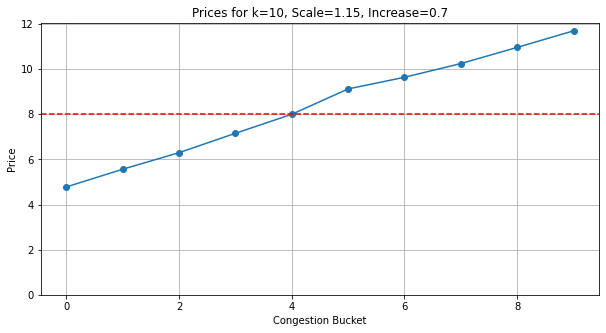

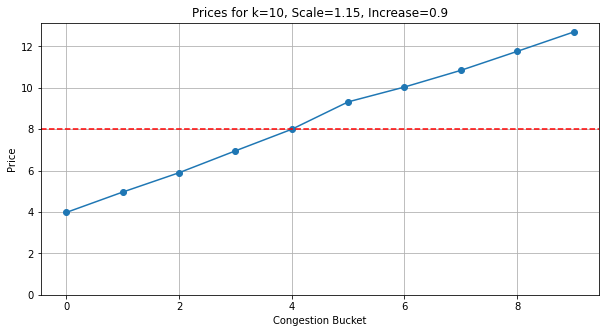

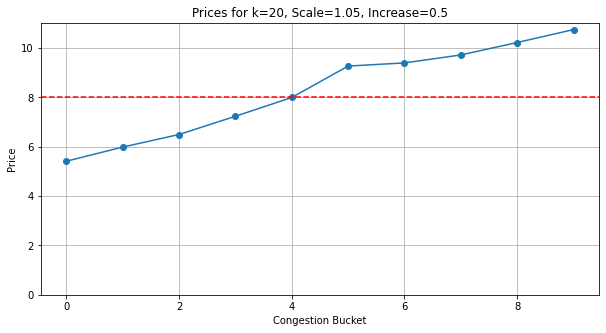

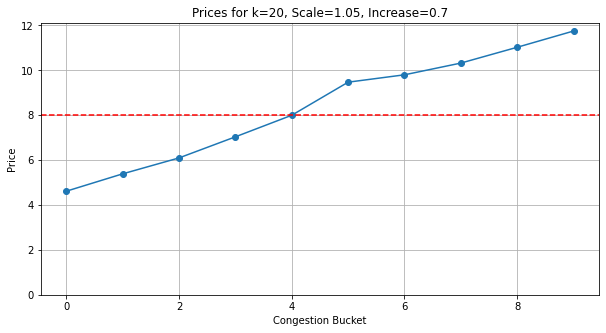

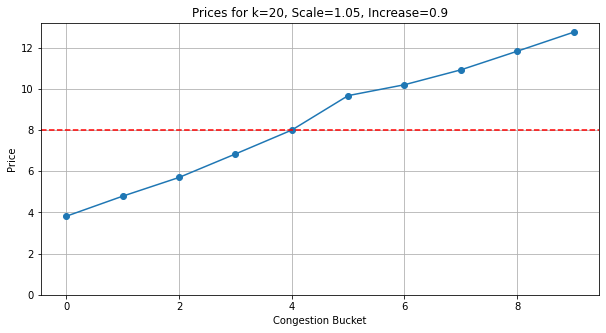

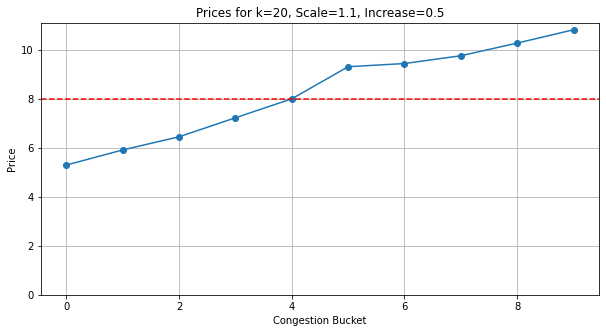

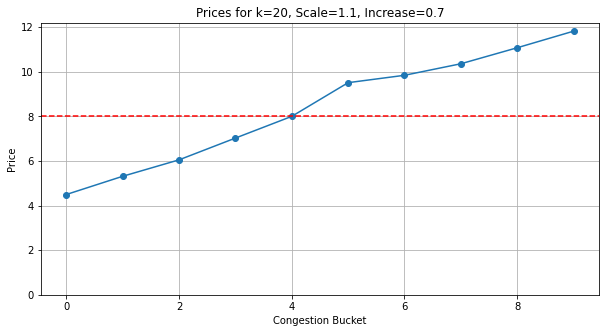

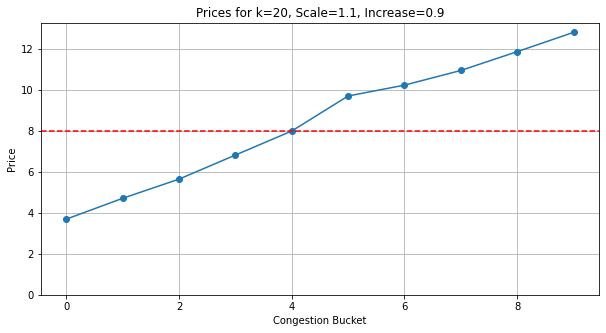

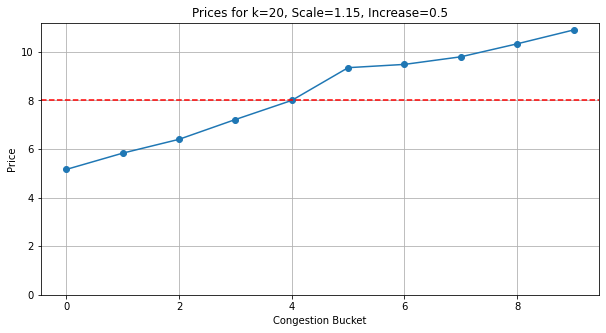

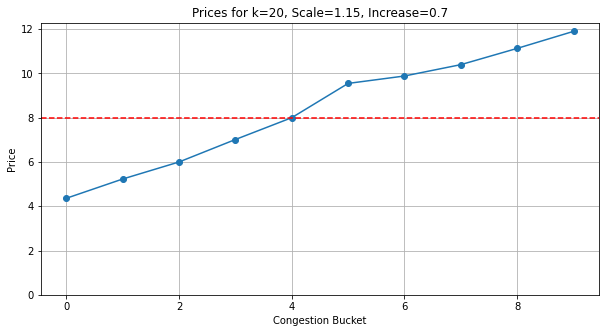

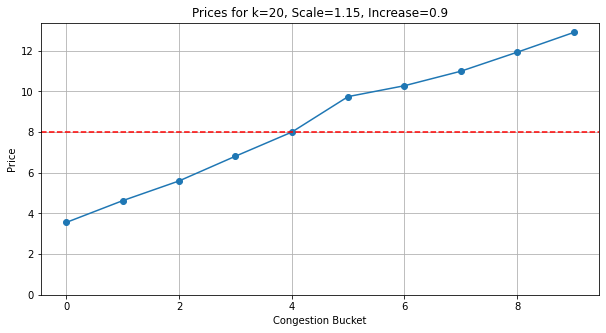

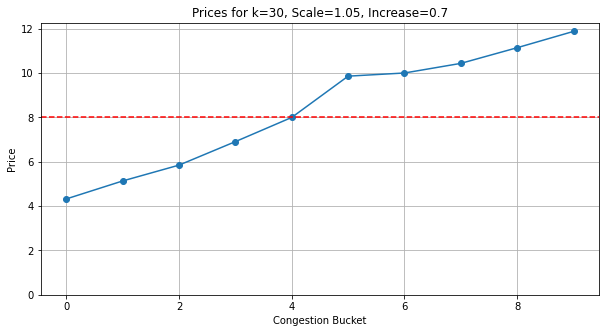

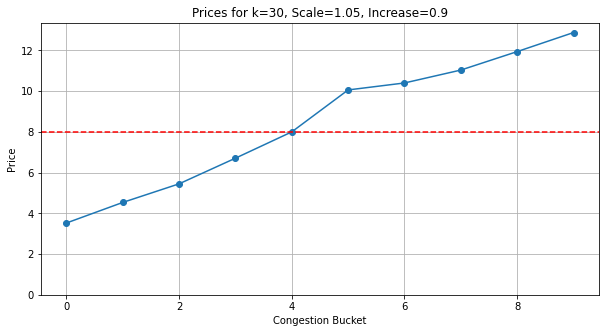

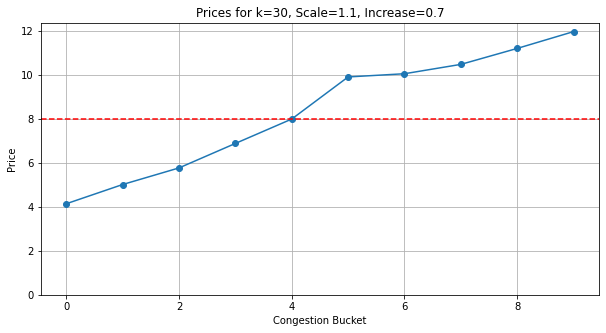

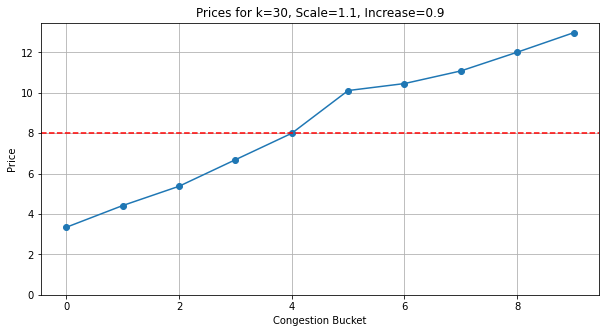

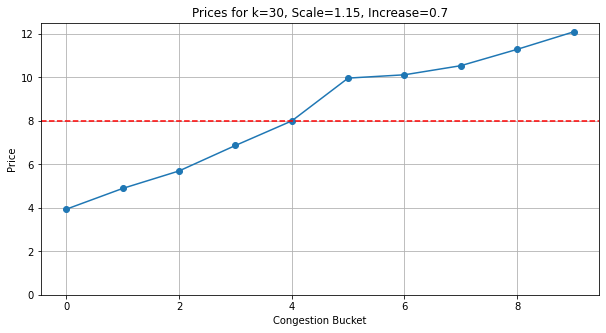

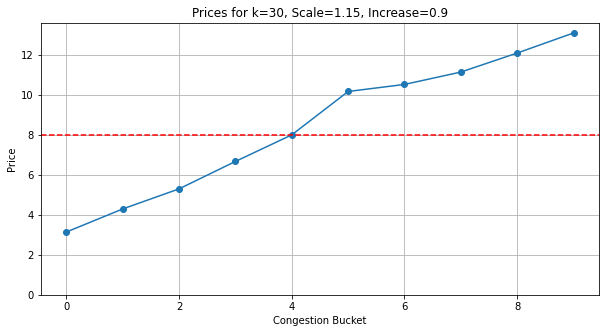

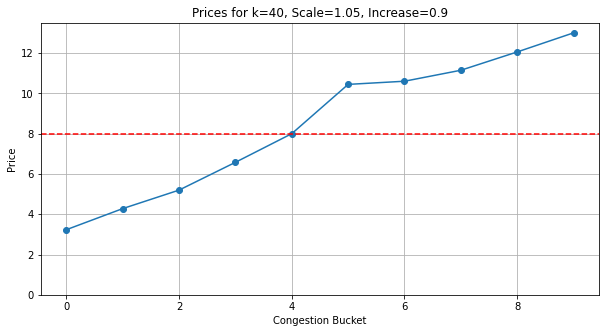

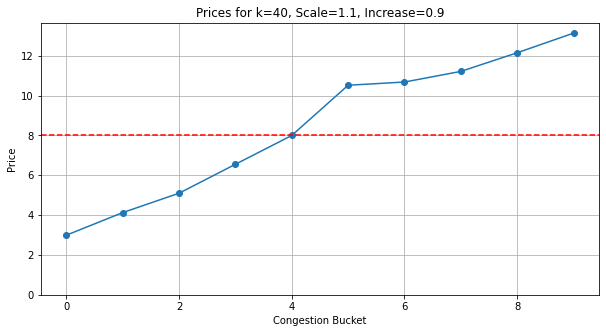

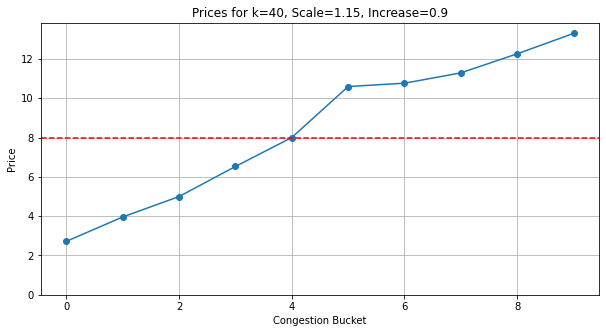

In [6]:
current_proportions = [0.17607206, 0.07766146, 0.11497712, 0.10846289, 0.13212514, 0.20613367,
                       0.10652815, 0.02549855, 0.0368258, 0.01571516]
target_proportions = [0.2001, 0.0997, 0.1377, 0.1209, 0.1350, 0.1693, 0.0883, 0.0158, 0.0274, 0.0058]
current_price = 8
base_scale = [1.05, 1.1, 1.15]
base_bucket = 4
k_range = range(10, 61, 10)
base_price_increase = [0, 0.3, 0.5, 0.7, 0.9]

optimal_settings = base_bucket_model_experimental(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase)

if not optimal_settings:
    print("No strictly increasing price set found. Consider adjusting the parameter ranges or the model.")

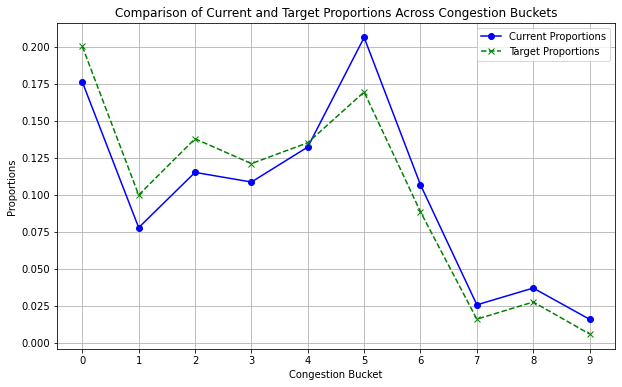

In [7]:
plot_proportions()

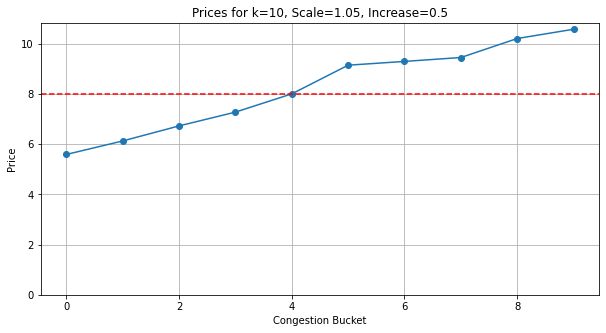

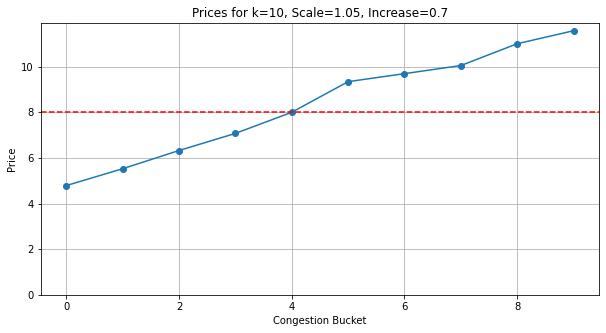

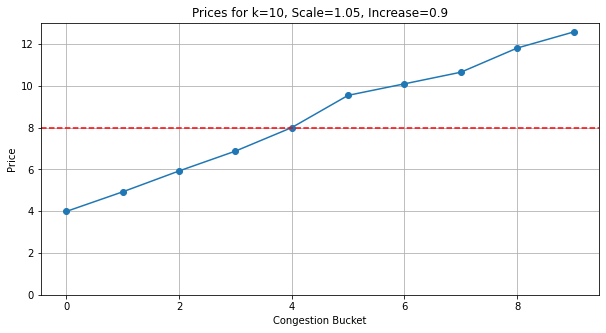

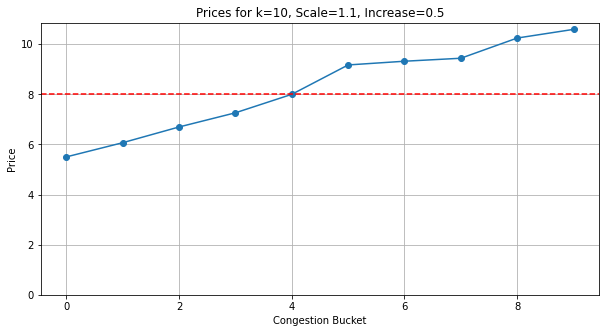

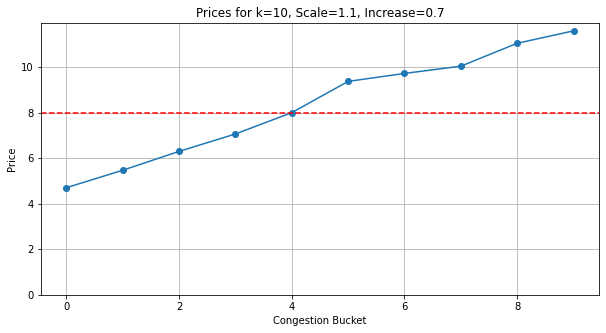

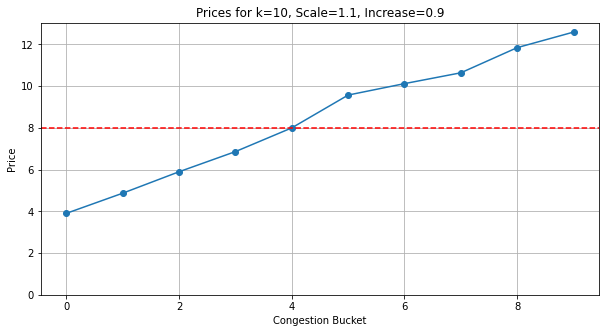

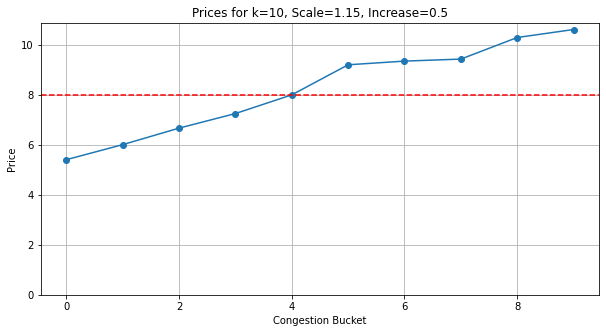

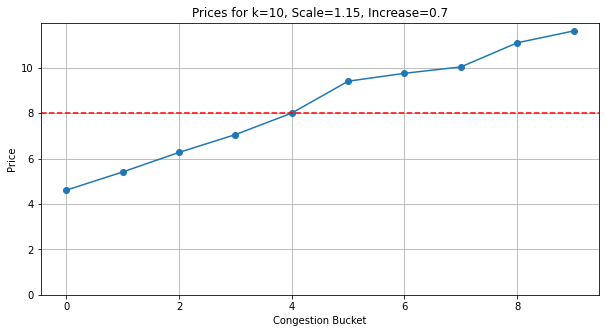

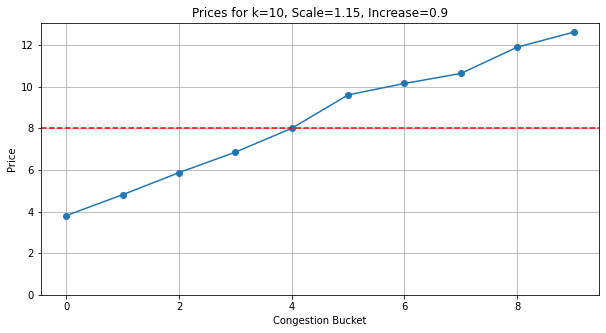

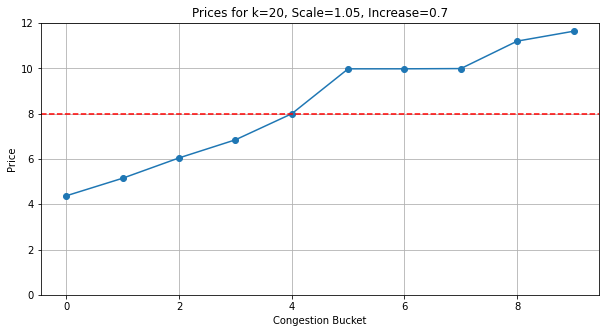

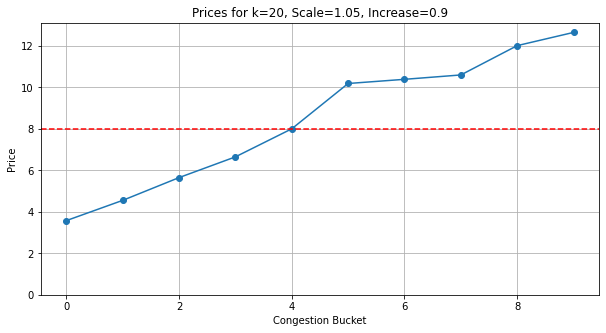

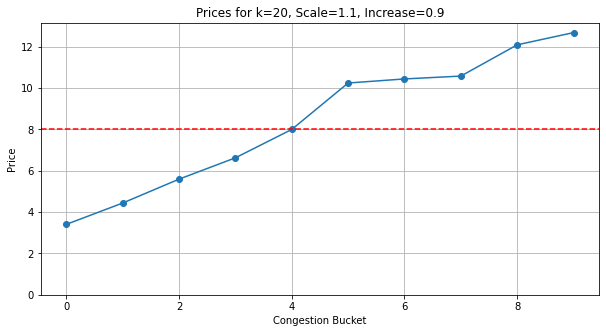

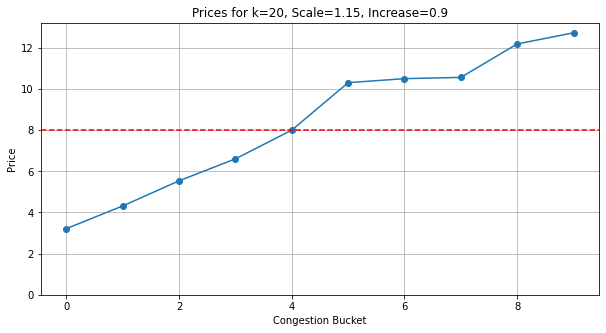

In [8]:
current_proportions = [0.17607206, 0.07766146, 0.11497712, 0.10846289, 0.13212514, 0.20613367,
                       0.10652815, 0.02549855, 0.0368258, 0.01571516]
target_proportions = [
    0.210,  # Slightly higher to encourage usage during very low congestion
    0.110,  # Slightly higher to encourage more usage in low congestion times
    0.140,  # Slight increase to balance the lower usage in very high congestion times
    0.130,  # Slightly above current to maintain a buffer at the base level
    0.125,  # Slightly lower to begin discouraging excessive congestion
    0.145,  # Lower than current to discourage high congestion
    0.080,  # Reduced to discourage usage during peak congestion times
    0.030,  # Minor increase to manage better distribution
    0.020,  # Lower to discourage nearing peak congestion
    0.010   # Significantly lower to strongly discourage highest congestion
]
current_price = 8
base_scale = [1.05, 1.1, 1.15]
base_bucket = 4
k_range = range(10, 61, 10)
base_price_increase = [0, 0.3, 0.5, 0.7, 0.9]

optimal_settings = base_bucket_model_experimental(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase)

if not optimal_settings:
    print("No strictly increasing price set found. Consider adjusting the parameter ranges or the model.")

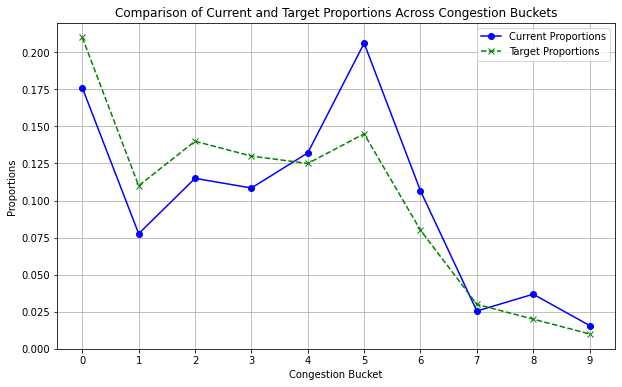

In [9]:
plot_proportions()

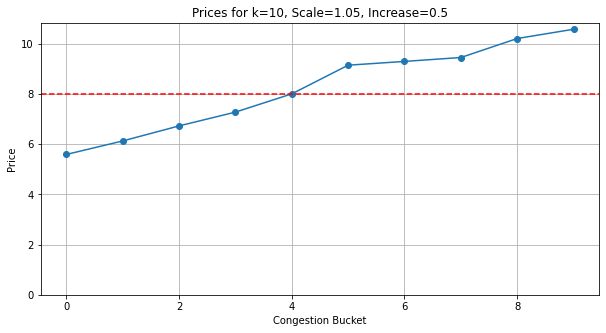

{(10, 1.05, 0.5): [5.58760376880375,
  6.125640976325,
  6.724122748,
  7.273860345,
  8,
  9.141903535,
  9.29247285375,
  9.4478900894375,
  10.2045186506125,
  10.572941533347375]}

In [10]:
current_price = 8
base_scale = [1.05]
base_bucket = 4
k_range = range(10, 11, 1)
base_price_increase = [0.5]
base_bucket_model_experimental(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase)


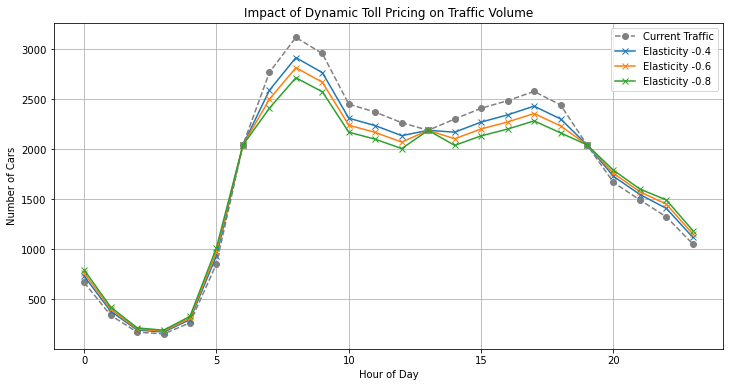

In [12]:
import numpy as np

# Provided data
hours = np.arange(24)
current_volumes = np.array([
    669.870125, 342.428627, 174.343994, 155.382605, 266.846334, 856.492590,
    2041.712559, 2767.807722, 3116.287051, 2956.367005, 2450.021451, 2371.027301,
    2265.222309, 2189.138456, 2301.773791, 2409.111934, 2485.070593, 2577.437598,
    2442.510140, 2044.202808, 1669.209048, 1493.645866, 1324.550702, 1053.202418
])
new_prices = [
    5.58760376880375, 6.125640976325, 6.724122748, 7.273860345, 8, 9.141903535,
    9.29247285375, 9.4478900894375, 10.2045186506125, 10.572941533347375
]
bucket_cutoffs = [
    0, 449.7, 899.4, 1349.1, 1798.8, 2248.5, 2698.2, 3147.9, 3597.6, 4047.3, 4497
]
current_price = 8  # Base price before change

# Array of different elasticities
elasticities = [-0.4, -0.6, -0.8]

# Determine the bucket for each hour based on volume
hour_buckets = np.digitize(current_volumes, bucket_cutoffs) - 1

# Plotting the results
plt.figure(figsize=(12, 6))
# Plot current traffic volumes
plt.plot(hours, current_volumes, label='Current Traffic', marker='o', color='gray', linestyle='--')

# Loop over each elasticity
for elasticity in elasticities:
    new_volumes = []
    for i, volume in enumerate(current_volumes):
        bucket_index = hour_buckets[i]
        if bucket_index < len(new_prices):
            price_change = new_prices[bucket_index] - current_price
            new_volume = volume * (1 + elasticity * (price_change / current_price))
            new_volumes.append(new_volume)
        else:
            new_volumes.append(volume)  # No change if out of the pricing range

    # Plot new traffic volumes for each elasticity
    plt.plot(hours, new_volumes, label=f'Elasticity {elasticity}', marker='x')

plt.title('Impact of Dynamic Toll Pricing on Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cars')
plt.legend()
plt.grid(True)
plt.show()